# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from pathlib import Path
from dotenv import load_dotenv
from newsapi import NewsApiClient
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

In [2]:
# Read your api key environment variable
# YOUR CODE HERE!
load_dotenv()
news_api_key = os.getenv("NEWS_API_KEY")

In [3]:
# Create a newsapi client
# YOUR CODE HERE!
newsapi = NewsApiClient(api_key = news_api_key)

In [4]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!
bitcoin_headlines = newsapi.get_everything(
    q = "bitcoin",
    language = "en",
    sort_by = "relevancy"
)

In [5]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
ethereum_headlines = newsapi.get_everything(
    q = 'ethereum',
    language = 'en',
    sort_by = 'relevancy'
)

In [6]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!
bitcoin_sentiments = []

for article in bitcoin_headlines['articles']:
    try:
        text = article['content']
        date = article['publishedAt'][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment['compound']
        pos = sentiment['pos']
        neu = sentiment['neu']
        neg = sentiment['neg']
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
        })
        
    except AttributeError:
        pass

#Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)
cols = ['date', 'text', 'compound', 'positive', 'negative', 'neutral']
bitcoin_df = bitcoin_df[cols]
bitcoin_df.head()

,date,text,compound,positive,negative,neutral
0,2021-02-08,Elon Musks cryptocurrency hype was more than j...,0.3182,0.091,0.000,0.909
1,2021-02-09,"Tesla, led by Elon Musk, confirmed that it pur...",0.3818,0.071,0.000,0.929
2,2021-02-09,"For a brief moment on Sunday, before Tesla sai...",-0.1027,0.000,0.038,0.962
3,2021-02-12,Twitter and Square CEO Jack Dorsey and rapper ...,0.2500,0.056,0.000,0.944
4,2021-02-08,"Today in an SEC filing, Tesla disclosed that i...",0.6597,0.137,0.000,0.863


In [7]:
# Create the ethereum sentiment scores DataFrame
# YOUR CODE HERE!
ethereum_sentiments = []

for article in ethereum_headlines['articles']:
    try:
        text = article['content']
        date = article['publishedAt'][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment['compound']
        pos = sentiment['pos']
        neu = sentiment['neu']
        neg = sentiment['neg']
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
        })
        
    except AttributeError:
        pass

#Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)
cols = ['date', 'text', 'compound', 'positive', 'negative', 'neutral']
ethereum_df = ethereum_df[cols]
ethereum_df.head()

,date,text,compound,positive,negative,neutral
0,2021-02-18,Worried that the GeForce RTX 3060 will be sold...,-0.3400,0.063,0.119,0.818
1,2021-01-28,Coinbase plans to go public by way of a direct...,0.0000,0.000,0.000,1.000
2,2021-02-04,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,0.000,1.000
3,2021-02-03,By Reuters Staff\r\nFILE PHOTO: Representation...,0.0000,0.000,0.000,1.000
4,2021-02-20,While the first Christie's auction of digital ...,0.0258,0.030,0.000,0.970


In [8]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
bitcoin_df.describe()

,compound,positive,negative,neutral
count,18.000000,18.000000,18.000000,18.000000
mean,0.199928,0.072111,0.019056,0.908778
std,0.376340,0.086707,0.035630,0.081887
min,-0.503700,0.000000,0.000000,0.647000
25%,0.000000,0.000000,0.000000,0.868750
50%,0.177900,0.053500,0.000000,0.919500
75%,0.411575,0.098500,0.024000,0.957250
max,0.921700,0.353000,0.114000,1.000000


In [9]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
ethereum_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.189495,0.051300,0.005950,0.942750
std,0.274088,0.054785,0.026609,0.062097
min,-0.340000,0.000000,0.000000,0.818000
25%,0.000000,0.000000,0.000000,0.900000
50%,0.012900,0.046500,0.000000,0.949500
75%,0.365100,0.082000,0.000000,1.000000
max,0.709600,0.144000,0.119000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: From this corpus sample of n = 18, Bitcoin has a higher mean positive sentiment score than the n = 18 corpus sample of Ethereum with 0.051300

Q: Which coin had the highest compound score?

A: Bitcoin has the higher max compound sentiment value of 0.921700, compared to Ethereum with 0.709600. 

Q. Which coin had the highest positive score?

A: Bitcoin has the higher max postive sentiment value of 0.353000, compared to Ethereum with 0.144000.

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

lemmatizer = WordNetLemmatizer()

In [11]:
# Expand the default stopwords list if necessary
# YOUR CODE HERE!
sw_addons = {'said', 'sent', 'found', 'including', 'basically', 'also'}

In [12]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    #Set Stopwords
    sw = set(stopwords.words('english'))
    #Set Regex
    regex = re.compile("[^a-zA-Z ]")
    # Remove the punctuation
    re_clean = regex.sub('', text)
    # Create a list of the words
    words = word_tokenize(re_clean)
    # Lemmatize Words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
    # Convert the words to lowercase & Remove the stop words
    tokens = [word.lower() for word in lem if word.lower() not in sw.union(sw_addons)]
    
    return tokens


In [13]:
# Create a new tokens column for bitcoin
# YOUR CODE HERE!
tokens = []
for index, row in bitcoin_df.iterrows():
    token = tokenizer(row['text'])
    tokens = tokens + [token]
bitcoin_df['tokens'] = tokens
cols = ['date', 'text', 'tokens', 'compound', 'positive', 'negative', 'neutral']
bitcoin_df = bitcoin_df[cols]
bitcoin_df.head()

,date,text,tokens,compound,positive,negative,neutral
0,2021-02-08,Elon Musks cryptocurrency hype was more than j...,"[elon, musks, cryptocurrency, hype, wa, idle, ...",0.3182,0.091,0.000,0.909
1,2021-02-09,"Tesla, led by Elon Musk, confirmed that it pur...","[tesla, led, elon, musk, confirmed, purchased,...",0.3818,0.071,0.000,0.929
2,2021-02-09,"For a brief moment on Sunday, before Tesla sai...","[brief, moment, sunday, tesla, invested, billi...",-0.1027,0.000,0.038,0.962
3,2021-02-12,Twitter and Square CEO Jack Dorsey and rapper ...,"[twitter, square, ceo, jack, dorsey, rapper, j...",0.2500,0.056,0.000,0.944
4,2021-02-08,"Today in an SEC filing, Tesla disclosed that i...","[today, sec, filing, tesla, disclosed, ha, acq...",0.6597,0.137,0.000,0.863


In [14]:
# Create a new tokens column for ethereum
# YOUR CODE HERE!
tokens = []
for index, row in ethereum_df.iterrows():
    token = tokenizer(row['text'])
    tokens = tokens+ [token]
ethereum_df['tokens'] = tokens
cols = ['date', 'text', 'tokens', 'compound', 'positive', 'negative', 'neutral']
ethereum_df = ethereum_df[cols]
ethereum_df.head()

,date,text,tokens,compound,positive,negative,neutral
0,2021-02-18,Worried that the GeForce RTX 3060 will be sold...,"[worried, geforce, rtx, sold, cryptocurrency, ...",-0.3400,0.063,0.119,0.818
1,2021-01-28,Coinbase plans to go public by way of a direct...,"[coinbase, plan, go, public, way, direct, list...",0.0000,0.000,0.000,1.000
2,2021-02-04,FILE PHOTO: Representation of the Ethereum vir...,"[file, photo, representation, ethereum, virtua...",0.0000,0.000,0.000,1.000
3,2021-02-03,By Reuters Staff\r\nFILE PHOTO: Representation...,"[reuters, stafffile, photo, representation, et...",0.0000,0.000,0.000,1.000
4,2021-02-20,While the first Christie's auction of digital ...,"[first, christies, auction, digital, artwork, ...",0.0258,0.030,0.000,0.970


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [15]:
from collections import Counter
from nltk import ngrams

In [16]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
btc_big_string = []
for index, row in bitcoin_df.iterrows():
    token = tokenizer(row['text'])
    btc_big_string = btc_big_string + token

bigrams = ngrams(btc_big_string, n = 2)
count = dict(Counter(bigrams))
bitcoin_bigrams = pd.DataFrame(list(count.items()), columns = ['bigram', 'count'])
bitcoin_bigrams = bitcoin_bigrams.sort_values('count', ascending = False)
bitcoin_bigrams

,bigram,count
27,"(billion, bitcoin)",3
0,"(elon, musks)",2
99,"(char, bitcoin)",2
89,"(popular, cryptocurrency)",2
62,"(jack, dorsey)",2
...,...,...
116,"(cryptocurrency, still)",1
115,"(later, cryptocurrency)",1
114,"(decade, later)",1
113,"(money, decade)",1


In [17]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
eth_big_string = []
for index, row in ethereum_df.iterrows():
    token = tokenizer(row['text'])
    eth_big_string = eth_big_string + token

bigrams = ngrams(eth_big_string, n = 2)
count = dict(Counter(bigrams))
ethereum_bigrams = pd.DataFrame(list(count.items()), columns = ['bigram', 'count'])
ethereum_bigrams = ethereum_bigrams.sort_values('count', ascending = False)
ethereum_bigrams

,bigram,count
138,"(record, high)",6
62,"(char, reuters)",5
130,"(feb, reuters)",5
145,"(char, new)",4
146,"(new, york)",4
...,...,...
110,"(ha, dedicated)",1
111,"(dedicated, card)",1
112,"(card, char)",1
113,"(photo, logo)",1


In [18]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [19]:
# Get the top 10 words for Bitcoin
# YOUR CODE HERE!
token_count(btc_big_string, N = 10)

[('char', 18),
 ('bitcoin', 12),
 ('cryptocurrency', 8),
 ('tesla', 6),
 ('elon', 4),
 ('wa', 4),
 ('billion', 4),
 ('ha', 4),
 ('company', 4),
 ('musk', 3)]

In [20]:
# Get the top 10 words for Ethereum
# YOUR CODE HERE!
token_count(eth_big_string, N = 10)

[('char', 20),
 ('reuters', 15),
 ('ethereum', 13),
 ('cryptocurrency', 7),
 ('week', 7),
 ('bitcoin', 7),
 ('high', 7),
 ('new', 6),
 ('record', 6),
 ('february', 5)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

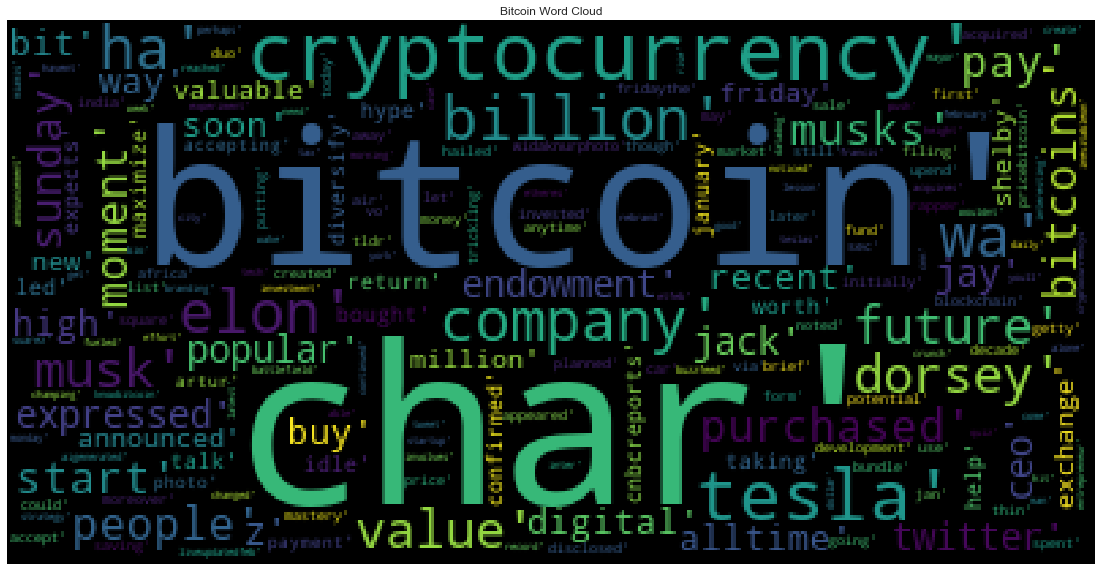

In [22]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!
btc_wc = WordCloud().generate(str(btc_big_string))
plt.imshow(btc_wc)
plt.axis("off")
plt.title('Bitcoin Word Cloud')
btc_wc.to_file(Path('../NLP_homework_uw_fintech/Images/btc_wc.png'))

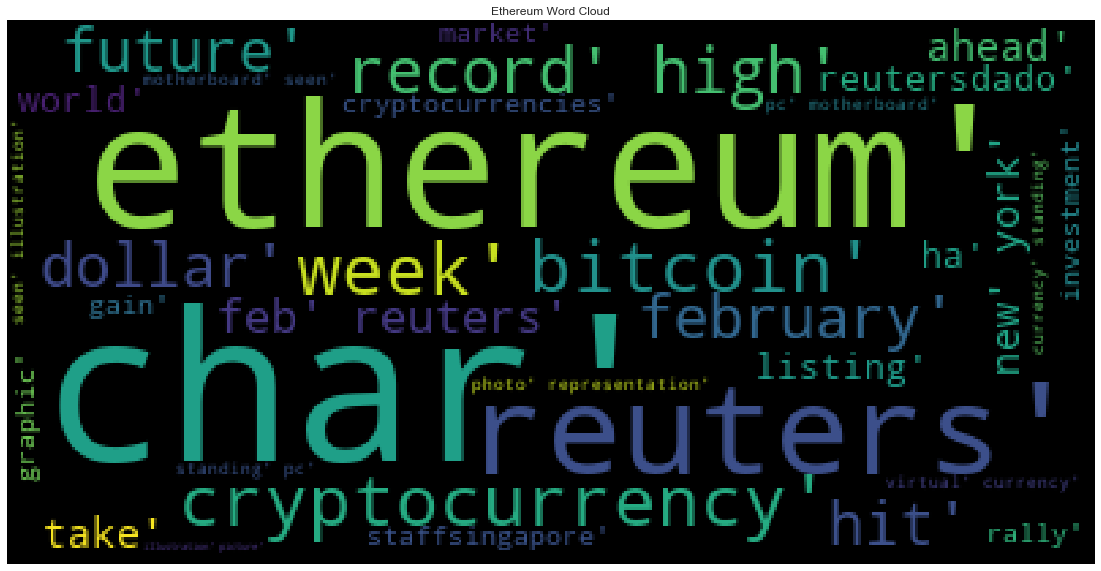

In [23]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
eth_wc = WordCloud().generate(str(eth_big_string))
plt.imshow(eth_wc)
plt.axis("off")
plt.title('Ethereum Word Cloud')
eth_wc.to_file(Path('../NLP_homework_uw_fintech/Images/eth_wc.png'))

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [24]:
import spacy
from spacy import displacy

In [25]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [26]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [27]:
# Concatenate all of the bitcoin text together
# YOUR CODE HERE!
btc_big_string = []
for index, row in bitcoin_df.iterrows():
    article = row['text']
    btc_big_string = str(btc_big_string) + str(article)
btc_big_string = btc_big_string[2:]
btc_big_string

'Elon Musks cryptocurrency hype was more than just idle talk. CNBCreports that Tesla not only bought $1.5 billion worth of Bitcoin to help diversify and maximize its returns, but will start taking pay… [+1182 chars]Tesla, led by Elon Musk, confirmed that it purchased about $ 1.5 billion in bitcoin in January and expects to start accepting it as a payment in the future.\xa0 | Photo by Artur Widak/NurPhoto via Getty… [+6118 chars]For a brief moment on Sunday, before Tesla said it had invested $1.5 billion in bitcoin and planned to let people use the cryptocurrency to pay for its cars, bitcoins price could be expressed with a … [+3302 chars]Twitter and Square CEO Jack Dorsey and rapper Jay Z have created an endowment to fund bitcoin development initially in Africa and India, Dorsey said Friday.\r\nThe duo is putting 500 bitcoin, which is … [+3984 chars]Today in an SEC filing, Tesla disclosed that it has acquired $1.5 billion in bitcoin, the popular cryptocurrency. Moreover, the company no

In [28]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
btc_ner = nlp(btc_big_string)
# Add a title to the document
# YOUR CODE HERE!
btc_ner.user_data['title'] = 'Bitcoin NER'

In [29]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(btc_ner, style = 'ent')

In [30]:
# List all Entities
# YOUR CODE HERE!
for token in btc_ner:
    print(token.text, token.pos_)

Elon PROPN
Musks PROPN
cryptocurrency NOUN
hype NOUN
was AUX
more ADJ
than SCONJ
just ADV
idle ADJ
talk NOUN
. PUNCT
CNBCreports NOUN
that DET
Tesla PROPN
not PART
only ADV
bought VERB
$ SYM
1.5 NUM
billion NUM
worth NOUN
of ADP
Bitcoin NOUN
to PART
help VERB
diversify VERB
and CCONJ
maximize VERB
its PRON
returns NOUN
, PUNCT
but CCONJ
will AUX
start VERB
taking VERB
pay NOUN
… PUNCT
[ X
+1182 X
chars]Tesla NUM
, PUNCT
led VERB
by ADP
Elon PROPN
Musk PROPN
, PUNCT
confirmed VERB
that SCONJ
it PRON
purchased VERB
about ADP
$ SYM
1.5 NUM
billion NUM
in ADP
bitcoin NOUN
in ADP
January PROPN
and CCONJ
expects VERB
to PART
start VERB
accepting VERB
it PRON
as ADP
a DET
payment NOUN
in ADP
the DET
future NOUN
. PUNCT
   SPACE
| NOUN
Photo NOUN
by ADP
Artur PROPN
Widak PROPN
/ SYM
NurPhoto PROPN
via ADP
Getty PROPN
… PUNCT
[ PUNCT
+6118 X
chars]For ADP
a DET
brief ADJ
moment NOUN
on ADP
Sunday PROPN
, PUNCT
before ADP
Tesla PROPN
said VERB
it PRON
had AUX
invested VERB
$ SYM
1.5 NUM
billion 

---

## Ethereum NER

In [31]:
# Concatenate all of the ehtereum text together
# YOUR CODE HERE!
eth_big_string = []
for index, row in ethereum_df.iterrows():
    article = row['text']
    eth_big_string = str(eth_big_string) + str(article)
eth_big_string = eth_big_string[2:]
eth_big_string

"Worried that the GeForce RTX 3060 will be sold out as cryptocurrency miners snap up every GPU in sight? NVIDIA thinks it has a simple way to help: make the new card unattractive to the crypto crowd. … [+1652 chars]Coinbase plans to go public by way of a direct listing, the company announced in a blog post today.\r\nThe cryptocurrency exchange was founded in 2012 and allows users to buy and trade decentralized to… [+1258 chars]FILE PHOTO: Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, February 3, 2018. REUTERS/Dado Ruvic/Illustration\r\nTOKYO (Reuters) - E… [+472 chars]By Reuters Staff\r\nFILE PHOTO: Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, February 3, 2018. REUTERS/Dado Ruvic/Illustration/Fi… [+1379 chars]While the first Christie's auction of digital artwork backed by NFT (non-fungible token) is still a few days away, one of the most notable

In [32]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
eth_ner = nlp(eth_big_string)
# Add a title to the document
# YOUR CODE HERE!
eth_ner.user_data['title'] = 'Ethereum NER'

In [33]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(eth_ner, style = 'ent')

In [34]:
# List all Entities
# YOUR CODE HERE!
for token in eth_ner:
    print(token.text, token.pos_)

Worried VERB
that SCONJ
the DET
GeForce PROPN
RTX PROPN
3060 NUM
will AUX
be AUX
sold VERB
out ADP
as ADP
cryptocurrency NOUN
miners NOUN
snap VERB
up ADP
every DET
GPU NOUN
in ADP
sight NOUN
? PUNCT
NVIDIA PROPN
thinks VERB
it PRON
has VERB
a DET
simple ADJ
way NOUN
to PART
help VERB
: PUNCT
make VERB
the DET
new ADJ
card NOUN
unattractive ADJ
to ADP
the DET
crypto ADJ
crowd NOUN
. PUNCT
… PUNCT
[ PUNCT
+1652 NUM
chars]Coinbase NOUN
plans VERB
to PART
go VERB
public ADJ
by ADP
way NOUN
of ADP
a DET
direct ADJ
listing NOUN
, PUNCT
the DET
company NOUN
announced VERB
in ADP
a DET
blog NOUN
post NOUN
today NOUN
. PUNCT

 SPACE
The DET
cryptocurrency NOUN
exchange NOUN
was AUX
founded VERB
in ADP
2012 NUM
and CCONJ
allows VERB
users NOUN
to PART
buy VERB
and CCONJ
trade NOUN
decentralized VERB
to ADP
… PUNCT
[ PUNCT
+1258 PUNCT
chars]FILE PROPN
PHOTO PROPN
: PUNCT
Representation PROPN
of ADP
the DET
Ethereum PROPN
virtual ADJ
currency NOUN
standing VERB
on ADP
the DET
PC NOUN
motherboard 